In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve  # 导入指标库
import prettytable  # 导入表格库

In [ ]:
# 参考代码：
# http://www.dataivy.cn/blog/classification_with_skelarn_tree/
# https://www.cnblogs.com/pinard/p/6056319.html

In [6]:
X = pd.read_csv(r"C:\Users\Tianh\Desktop\DMLab\data\car_data.csv",header = None)

In [7]:
print(X.shape)
X.head()

(1728, 7)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
le = preprocessing.LabelEncoder()
le.fit(["vhigh","high","med","low"])
le1 = preprocessing.LabelEncoder()
le1.fit(["big","med","small"])
le2 = preprocessing.LabelEncoder()
le2.fit(["vgood","good","acc","unacc"])

LabelEncoder()

In [10]:
X[:,4]

array(['small', 'small', 'small', ..., 'big', 'big', 'big'], dtype=object)

In [11]:
X[:,0] = le.transform(X[:,0])
X[:,1] = le.transform(X[:,1])
X[:,4] = le1.transform(X[:,4])
X[:,5] = le.transform(X[:,5])
X[:,6] = le2.transform(X[:,6])

In [12]:
for i in range(len(X)):
    if X[i,2] == '5more':
        X[i,2] = 5
    if X[i,3] == 'more':
        X[i,3] = 5

In [13]:
# X_label = X.iloc[:,6]
x = X[:,0:6].astype(np.int32)
y = X[:,6].astype(np.int32)

In [14]:
x

array([[3, 3, 2, 2, 2, 1],
       [3, 3, 2, 2, 2, 2],
       [3, 3, 2, 2, 2, 0],
       ...,
       [1, 1, 5, 5, 0, 1],
       [1, 1, 5, 5, 0, 2],
       [1, 1, 5, 5, 0, 0]])

In [15]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
print(y_train.shape)
print(y_test.shape)

(1382,)
(346,)


In [102]:
clf=tree.DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=None,min_samples_split=2,
                                min_samples_leaf=1,min_weight_fraction_leaf=0.0,random_state=None)

In [127]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [130]:
pre_y = clf.predict(x_test)

confusion matrix
+---------+---------+---------+---------+
| Field 1 | Field 2 | Field 3 | Field 4 |
+---------+---------+---------+---------+
|    74   |    1    |    1    |    0    |
|    3    |    12   |    0    |    0    |
+---------+---------+---------+---------+


In [149]:
# 核心评估指标
y_score = clf.predict_proba(x_test)  # 获得决策树的预测概率
# print(y_score)
# fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])  # ROC
# # 错误 因为ROC曲线仅适用于二进制分类任务？
# auc_s = auc(fpr, tpr)  # AUC
accuracy_s = accuracy_score(y_test, pre_y)  # 准确率
precision_s = precision_score(y_test, pre_y,average=None)  # 精确度
recall_s = recall_score(y_test, pre_y,average=None)  # 召回率
f1_s = f1_score(y_test, pre_y,average=None)  # F1得分
# core_metrics = prettytable.PrettyTable()  # 创建表格实例
# core_metrics.field_names = [ 'accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
# core_metrics.add_row([accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
# print ('core metrics')
# print (core_metrics)  # 打印输出核心评估指标
print("accuracy")
print(accuracy_s)
print('-----------')
print("precision")
print(precision_s)
print('-----------')
print("recall")
print(recall_s)



print('-----------')
print("f1")
print(f1_s)
print('-----------')
# 返回各类的准确率

accuracy
0.9797687861271677
-----------
precision
[0.93670886 0.92307692 0.99585062 1.        ]
-----------
recall
[0.97368421 0.8        0.99173554 1.        ]
-----------
f1
[0.95483871 0.85714286 0.99378882 1.        ]
-----------


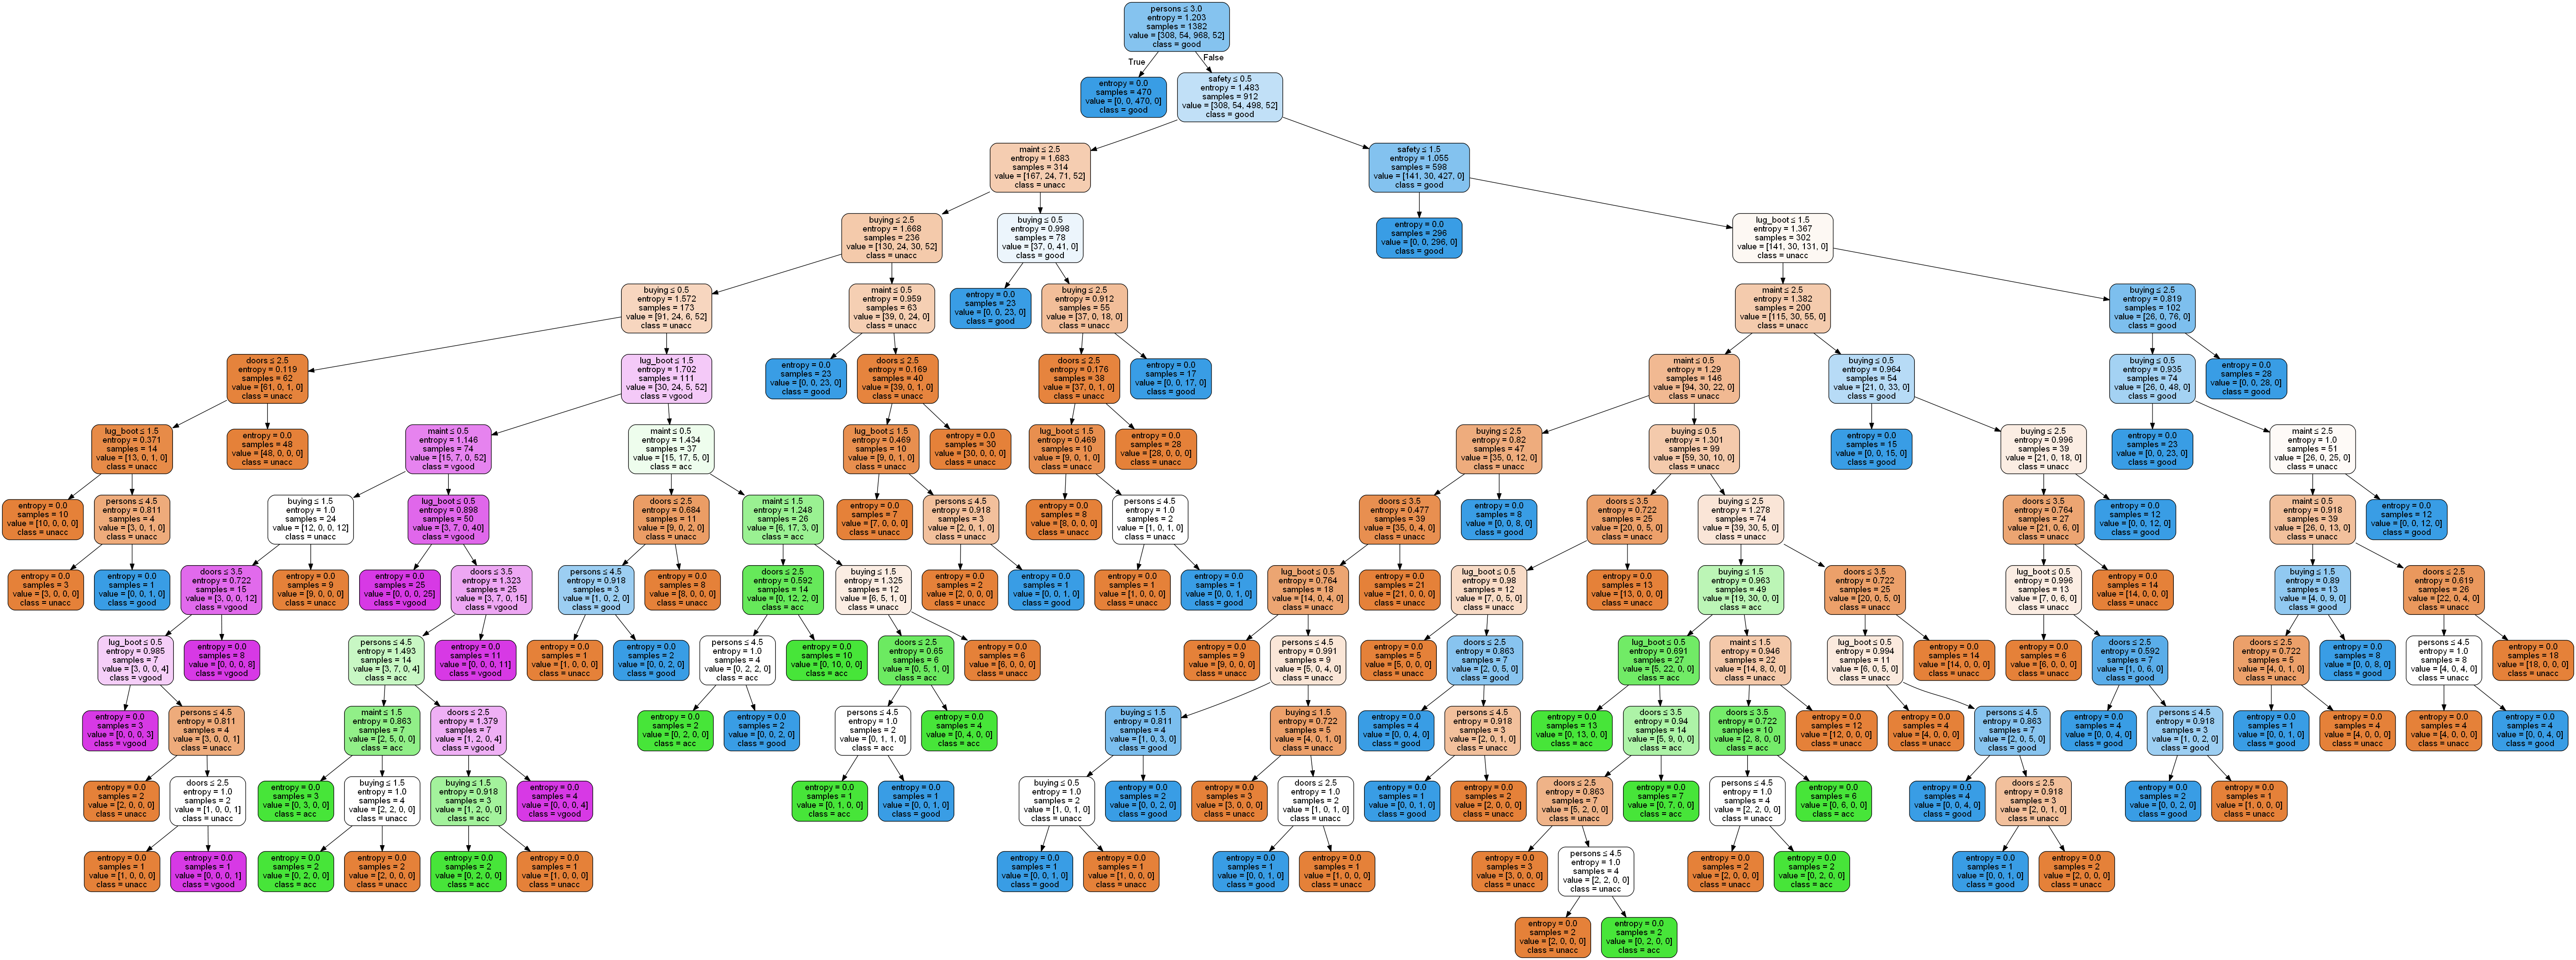

In [124]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
import os
os.environ["PATH"] += os.pathsep + "D:\\Google\\graphviz-2.38\\release\\bin\\"
feature_names = ['buying','maint','doors','persons','lug_boot','safety']
target_names = ['unacc', 'acc', 'good', 'vgood']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [150]:
clf=tree.DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None,min_samples_split=2,
                                min_samples_leaf=1,min_weight_fraction_leaf=0.0,random_state=None)

In [151]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [152]:
pre_y = clf.predict(x_test)

In [153]:
# 混淆矩阵
confusion_m = confusion_matrix(y_test, pre_y)  # 获得混淆矩阵
confusion_matrix_table = prettytable.PrettyTable()  # 创建表格实例
confusion_matrix_table.add_row(confusion_m[0, :])  # 增加第一行数据
confusion_matrix_table.add_row(confusion_m[1, :])  # 增加第二行数据
print ('confusion matrix')
print (confusion_matrix_table)  # 打印输出混淆矩阵

confusion matrix
+---------+---------+---------+---------+
| Field 1 | Field 2 | Field 3 | Field 4 |
+---------+---------+---------+---------+
|    71   |    1    |    4    |    0    |
|    3    |    12   |    0    |    0    |
+---------+---------+---------+---------+


In [154]:
# 核心评估指标
y_score = clf.predict_proba(x_test)  # 获得决策树的预测概率
# print(y_score)
# fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])  # ROC
# # 错误 因为ROC曲线仅适用于二进制分类任务？
# auc_s = auc(fpr, tpr)  # AUC
accuracy_s = accuracy_score(y_test, pre_y)  # 准确率
precision_s = precision_score(y_test, pre_y,average=None)  # 精确度
recall_s = recall_score(y_test, pre_y,average=None)  # 召回率
f1_s = f1_score(y_test, pre_y,average=None)  # F1得分
# core_metrics = prettytable.PrettyTable()  # 创建表格实例
# core_metrics.field_names = [ 'accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
# core_metrics.add_row([accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
# print ('core metrics')
# print (core_metrics)  # 打印输出核心评估指标
print("accuracy")
print(accuracy_s)
print('-----------')
print("precision")
print(precision_s)
print('-----------')
print("recall")
print(recall_s)
print('-----------')
print("f1")
print(f1_s)
print('-----------')
# 返回各类的准确率

accuracy
0.9682080924855492
-----------
precision
[0.92207792 0.92307692 0.98353909 1.        ]
-----------
recall
[0.93421053 0.8        0.98760331 1.        ]
-----------
f1
[0.92810458 0.85714286 0.98556701 1.        ]
-----------


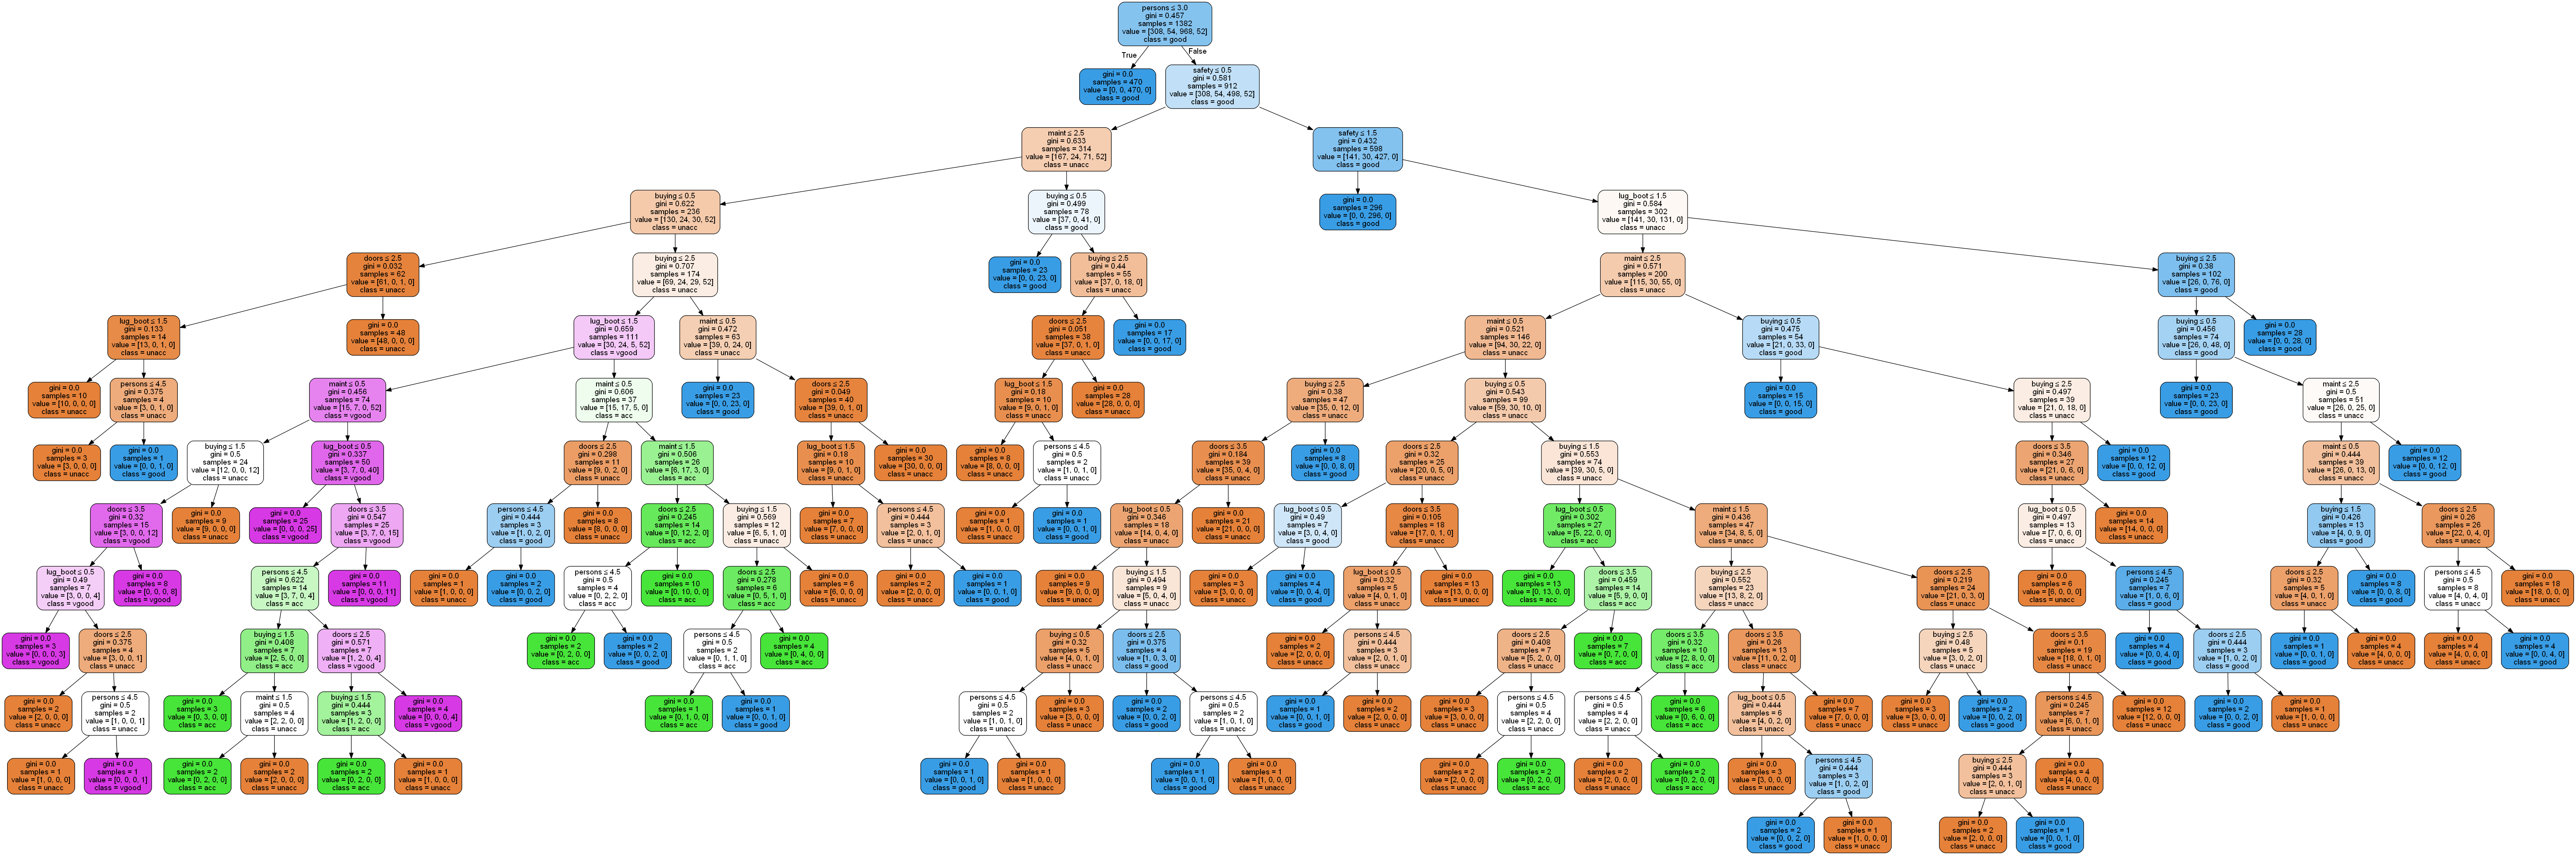

In [155]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
import os
os.environ["PATH"] += os.pathsep + "D:\\Google\\graphviz-2.38\\release\\bin\\"
feature_names = ['buying','maint','doors','persons','lug_boot','safety']
target_names = ['unacc', 'acc', 'good', 'vgood']
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())